<a href="https://colab.research.google.com/github/Ekawaka/MACHINE-LEARNING-1E/blob/main/Wild_blueberry_yield_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


### **1. Build model on the Train Data**

### **Importing the necessary Libraries**

In [1]:
import math
import pickle #For saving the model
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [65]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, GammaRegressor, TweedieRegressor, PoissonRegressor
from sklearn.preprocessing import PolynomialFeatures, FunctionTransformer, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.datasets import make_regression

### **STEP 1: Explore and visualise your data**

In [3]:
train = pd.read_csv('/content/train.csv.zip')
train.head()

,id,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,0,25.0,0.50,0.25,0.75,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.425011,0.417545,32.460887,4476.81146
1,1,25.0,0.50,0.25,0.50,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.444908,0.422051,33.858317,5548.12201
2,2,12.5,0.25,0.25,0.63,0.63,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.552927,0.470853,38.341781,6869.77760
3,3,12.5,0.25,0.25,0.63,0.50,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.565976,0.478137,39.467561,6880.77590
4,4,25.0,0.50,0.25,0.63,0.63,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.579677,0.494165,40.484512,7479.93417


### **Data Summary**

In [4]:
train.describe()

,id,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
count,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000
mean,7644.000000,19.704690,0.389314,0.286768,0.492675,0.592355,82.169887,49.673281,68.656256,59.229538,28.660553,48.568500,18.660865,0.324176,0.502741,0.446553,36.164950,6025.193999
std,4413.698468,6.595211,0.361643,0.059917,0.148115,0.139489,9.146703,5.546405,7.641807,6.610640,3.195367,5.390545,11.657582,0.163905,0.074390,0.037035,4.031087,1337.056850
min,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,69.700000,39.000000,58.200000,50.200000,24.300000,41.200000,1.000000,0.060000,0.192732,0.311921,22.079199,1945.530610
25%,3822.000000,12.500000,0.250000,0.250000,0.380000,0.500000,77.400000,46.800000,64.700000,55.800000,27.000000,45.800000,16.000000,0.260000,0.458246,0.419216,33.232449,5128.163510
50%,7644.000000,25.000000,0.500000,0.250000,0.500000,0.630000,86.000000,52.000000,71.900000,62.000000,30.000000,50.800000,16.000000,0.260000,0.506600,0.446570,36.040675,6117.475900
75%,11466.000000,25.000000,0.500000,0.380000,0.630000,0.750000,86.000000,52.000000,71.900000,62.000000,30.000000,50.800000,24.000000,0.390000,0.560445,0.474134,39.158238,7019.694380
max,15288.000000,40.000000,18.430000,0.585000,0.750000,0.750000,94.600000,57.200000,79.000000,68.200000,33.000000,55.900000,34.000000,0.560000,0.652144,0.535660,46.585105,8969.401840


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15289 entries, 0 to 15288
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    15289 non-null  int64  
 1   clonesize             15289 non-null  float64
 2   honeybee              15289 non-null  float64
 3   bumbles               15289 non-null  float64
 4   andrena               15289 non-null  float64
 5   osmia                 15289 non-null  float64
 6   MaxOfUpperTRange      15289 non-null  float64
 7   MinOfUpperTRange      15289 non-null  float64
 8   AverageOfUpperTRange  15289 non-null  float64
 9   MaxOfLowerTRange      15289 non-null  float64
 10  MinOfLowerTRange      15289 non-null  float64
 11  AverageOfLowerTRange  15289 non-null  float64
 12  RainingDays           15289 non-null  float64
 13  AverageRainingDays    15289 non-null  float64
 14  fruitset              15289 non-null  float64
 15  fruitmass          

In [6]:
# Add a new column called 'yield'
# Example formula: yield = fruitset * fruitmass
train['yield'] = train['fruitset'] * train['fruitmass']

### **Data Visualisation**

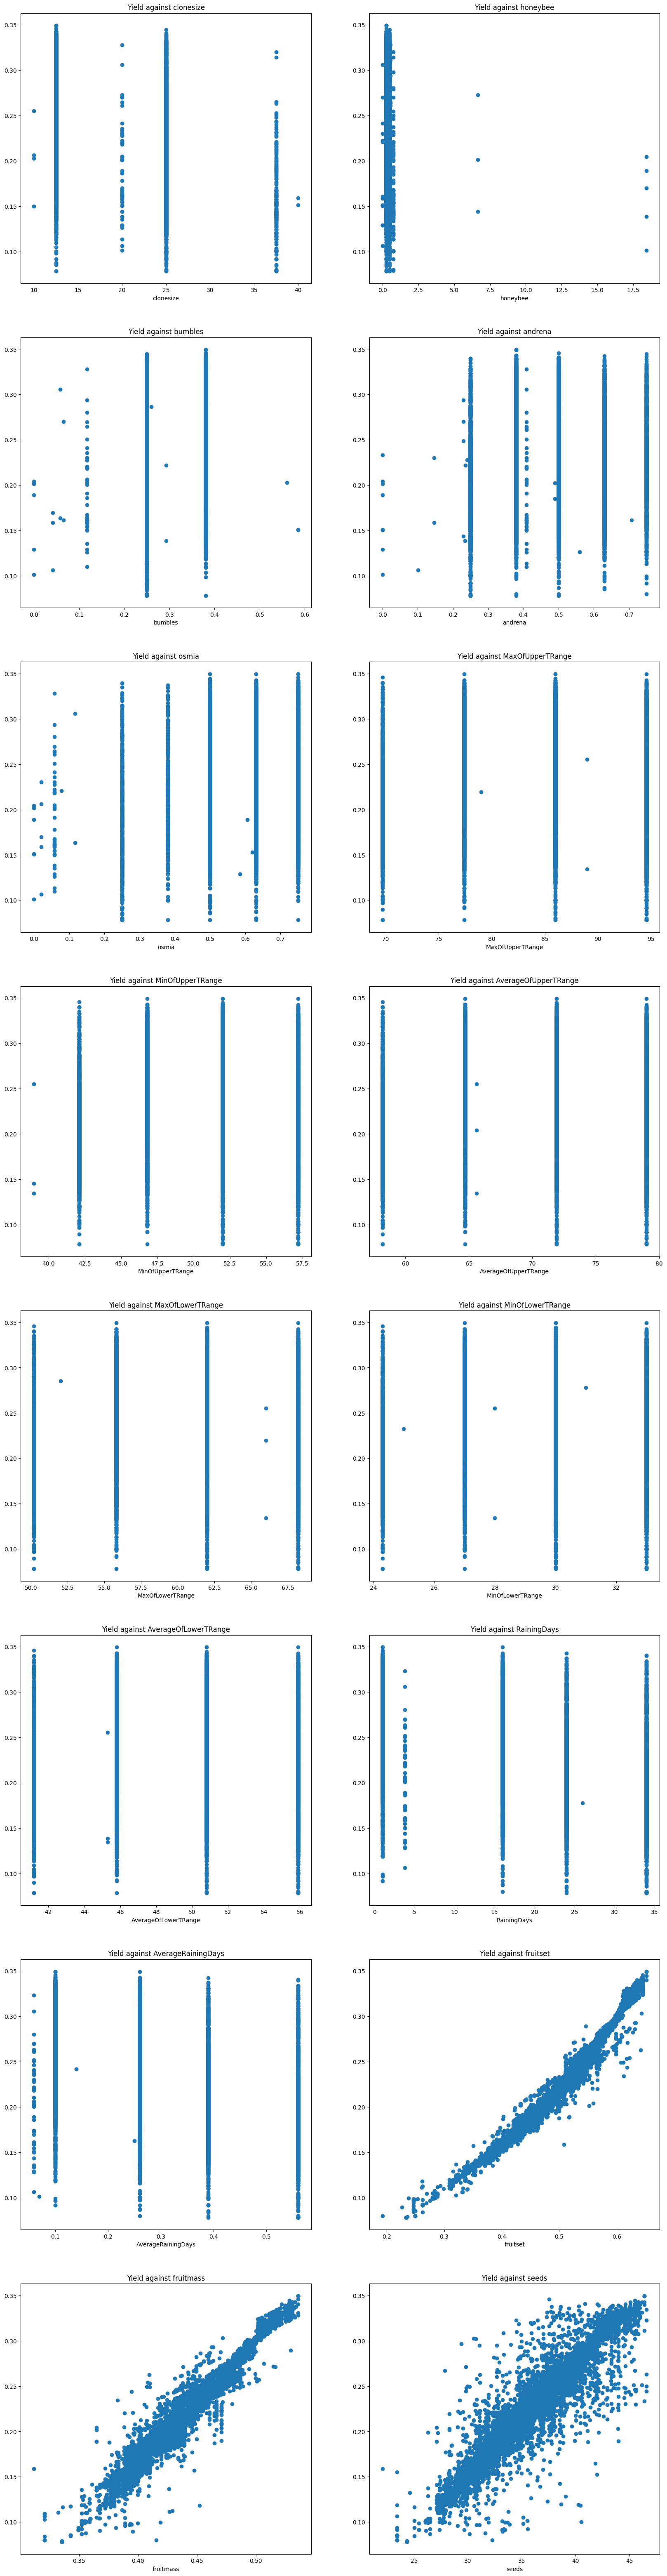

In [7]:
plt.figure(figsize=(20,80))

for i in range(1,17):
    plt.subplot(8,2,i)
    plt.scatter(train[train.columns[i]],train['yield'])
    plt.title(f'Yield against {train.columns[i]}')
    plt.xlabel(train.columns[i])

plt.show()

### **STEP 2: Preprocess**

1. Handle missing values
2. Drop duplicate observations
3. Encode categorical variables
4. Scale your data (e.g. Standardisation)
5. Choose the relevant features for your model Note that some of these preprocessing steps can be done on the modeling stage using a Scikit Learn pipeline.

In [8]:
# Check for missing values in each column
missing_values = train.isnull().sum()
print(missing_values)

id                      0
clonesize               0
honeybee                0
bumbles                 0
andrena                 0
osmia                   0
MaxOfUpperTRange        0
MinOfUpperTRange        0
AverageOfUpperTRange    0
MaxOfLowerTRange        0
MinOfLowerTRange        0
AverageOfLowerTRange    0
RainingDays             0
AverageRainingDays      0
fruitset                0
fruitmass               0
seeds                   0
yield                   0
dtype: int64


In [9]:
# Check for duplicate rows
duplicates = train.duplicated()

# Count the number of duplicate rows
num_duplicates = duplicates.sum()
print(num_duplicates)

0


In [25]:
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

In [10]:
train.columns

Index(['id', 'clonesize', 'honeybee', 'bumbles', 'andrena', 'osmia',
       'MaxOfUpperTRange', 'MinOfUpperTRange', 'AverageOfUpperTRange',
       'MaxOfLowerTRange', 'MinOfLowerTRange', 'AverageOfLowerTRange',
       'RainingDays', 'AverageRainingDays', 'fruitset', 'fruitmass', 'seeds',
       'yield'],
      dtype='object')

In [11]:
X = train[['clonesize', 'honeybee', 'bumbles', 'andrena', 'osmia',
       'MaxOfUpperTRange', 'MinOfUpperTRange', 'AverageOfUpperTRange',
       'MaxOfLowerTRange', 'MinOfLowerTRange', 'AverageOfLowerTRange',
       'RainingDays', 'AverageRainingDays', 'fruitset', 'fruitmass', 'seeds']]
y = train['yield']
print(X.shape,y.shape)

(15289, 16) (15289,)


### **STEP 3: Find the most optimal model**

### Basic Modeling

In [75]:
# Check the shape of the initial dataset
print("Initial data shape:", train.shape)

# Prepare the data
X = train.drop(columns=['yield'])
y = train['yield']

# Check the shapes of features and target
print("Features shape:", X.shape)
print("Target shape:", y.shape)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes of the split data
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

# Handle infinite values and large values
# Replace infinities with a large finite number
X_train.replace([np.inf, -np.inf], np.finfo(np.float64).max, inplace=True)
X_test.replace([np.inf, -np.inf], np.finfo(np.float64).max, inplace=True)

# Ensure there are no zero or negative values before applying log transformation
# Replace zeros with a small value (e.g., 1e-10)
X_train = X_train.replace(0, 1e-10)
X_test = X_test.replace(0, 1e-10)

# Clip values to the maximum and minimum representable by float64
max_float64 = np.finfo(np.float64).max
X_train = np.clip(X_train, -max_float64, max_float64)
X_test = np.clip(X_test, -max_float64, max_float64)

# Build and train the model pipeline
model2 = make_pipeline(FunctionTransformer(np.log, validate=True), LinearRegression())
model2.fit(X_train, y_train)

# Make predictions
y_pred = model2.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Root Mean Squared Error:", math.sqrt(mse))
print("R^2 Score:", r2)

Initial data shape: (15289, 18)
Features shape: (15289, 17)
Target shape: (15289,)
X_train shape: (12231, 17)
X_test shape: (3058, 17)
y_train shape: (12231,)
y_test shape: (3058,)
Root Mean Squared Error: 0.006763328376087683
R^2 Score: 0.9818244538443462


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(12231, 16) (3058, 16) (12231,) (3058,)


In [13]:
# # Create a sample dataset
# X, y = make_regression(n_samples=100, n_features=2, noise=0.1, random_state=42)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Access the linear regression model within the pipeline
regressor = pipeline.named_steps['regressor']

# Access the intercept and coefficients of the linear regression model
print("Intercept:", regressor.intercept_)
print("Coefficients:", regressor.coef_)

Intercept: 0.22677758012672547
Coefficients: [-2.52255180e-04  3.86976264e-05  5.38475693e-05 -1.85180599e-04
 -2.49017400e-04  3.61824795e-03 -3.91603638e-04 -1.05098590e-02
 -1.43653151e-03  6.91926837e-03  1.79327738e-03 -2.70688943e-03
  2.63476198e-03  2.91013464e-02  2.04029367e-02  1.52554448e-03]


In [14]:
# fitting a simple linear regression model
model = LinearRegression()
model = model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test,y_pred)
print(math.sqrt(mse),r2)

0.0030398885227782206 0.9965464300133539


**Polynomial Features**

In regression, one of the most important parameter to experiment is the polynomial degree but this is available as a preprocessing step and not on our end model. Why do we do polynomial transformations.

1. Our X variables do not have a linear relationship with our target variable
2. There could exist some quadratic or other non-linear relationship that gives us a line of better fit.
3. What we do is we transform our data (X) to higher polynomial degree to fit a line of better fit as below.


Text(0.5, 0, 'x^2')

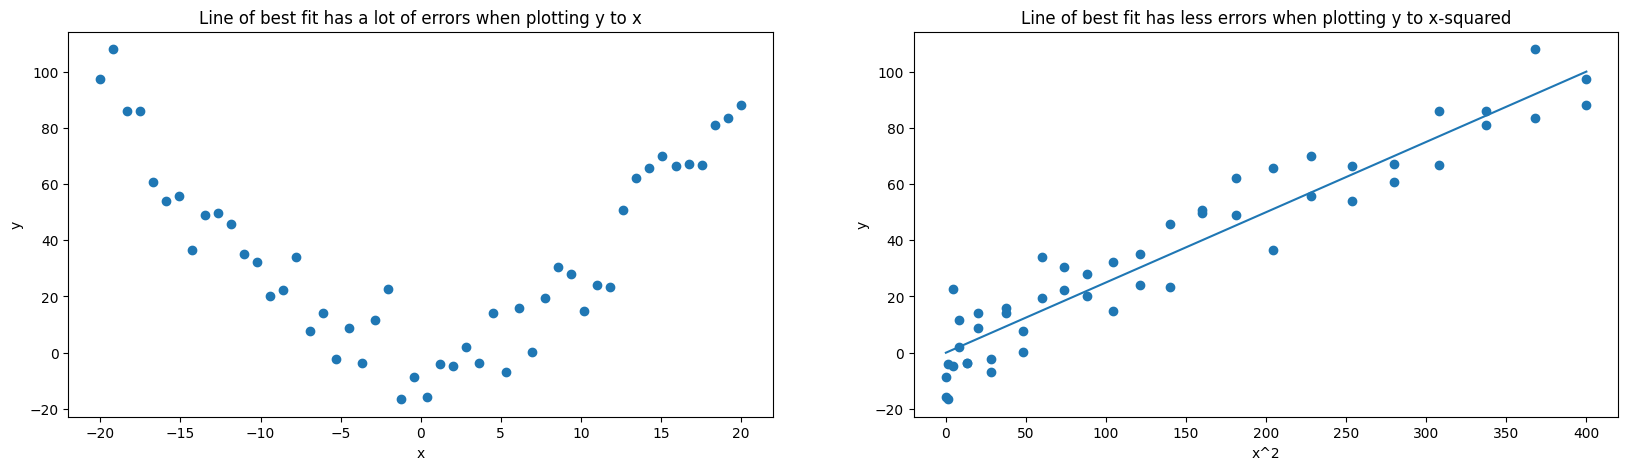

In [15]:
## Generate random data
distr = np.linspace(-10,10,50)
noise = np.random.normal(0,10,50)

x = 2*distr
y = distr**2 + noise
z = 2*distr

plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
plt.title('Line of best fit has a lot of errors when plotting y to x')
plt.scatter(x,y)
plt.plot
plt.ylabel('y')
plt.xlabel('x')

plt.subplot(1,2,2)
plt.title('Line of best fit has less errors when plotting y to x-squared')
plt.scatter(x**2,y)
plt.plot([0,400],[0,100])
plt.ylabel('y')
plt.xlabel('x^2')

In [22]:
model1 = make_pipeline(StandardScaler(),PolynomialFeatures(degree=1),LinearRegression())
model1 = model1.fit(X_train, y_train)
y_pred = model1.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test,y_pred)
print(math.sqrt(mse),r2)

0.0030398885227782267 0.9965464300133539


Higher polynomial degrees didn't improve my model performance, so I used polynomial degree as 1

In [76]:
model2 = make_pipeline(FunctionTransformer(func=np.log),LinearRegression())
model2 = model2.fit(X_train, y_train)
y_pred = model2.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test,y_pred)
print(math.sqrt(mse),r2)

0.006763328376087683 0.9818244538443462


In [59]:
model = make_pipeline(StandardScaler(),LinearRegression())
cross_val_score(model, X, y, cv=10, scoring='neg_mean_absolute_error').mean() * -1

0.002260244834520888

**Regularisation**

Adding bias to the model to prevent overfitting.

In [77]:
#Apply Ridge
model = make_pipeline(StandardScaler(),Ridge(alpha=1))
model = model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test,y_pred)
print(math.sqrt(mse),r2)

0.0030939569660952725 0.9961963980671927


In [55]:
#Apply Lasso
model = make_pipeline(StandardScaler(),Lasso(alpha=10))
model = model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test,y_pred)
print(math.sqrt(mse),r2)

0.050188563763174814 -0.0008662789211808519


In [61]:
## You can include polynomial features with your regularised regression
model1 = make_pipeline(StandardScaler(),PolynomialFeatures(degree=1),Ridge(alpha=1))
model1 = model1.fit(X_train, y_train)
y_pred = model1.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test,y_pred)
print(math.sqrt(mse),r2)

0.00309395696609531 0.9961963980671926


In [60]:
#Apply ElasticNet
model = make_pipeline(StandardScaler(),ElasticNet(alpha=1,l1_ratio=0.4))
model = model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test,y_pred)
print(math.sqrt(mse),r2)

0.050188563763174814 -0.0008662789211808519


### **Generalised Linear Models**

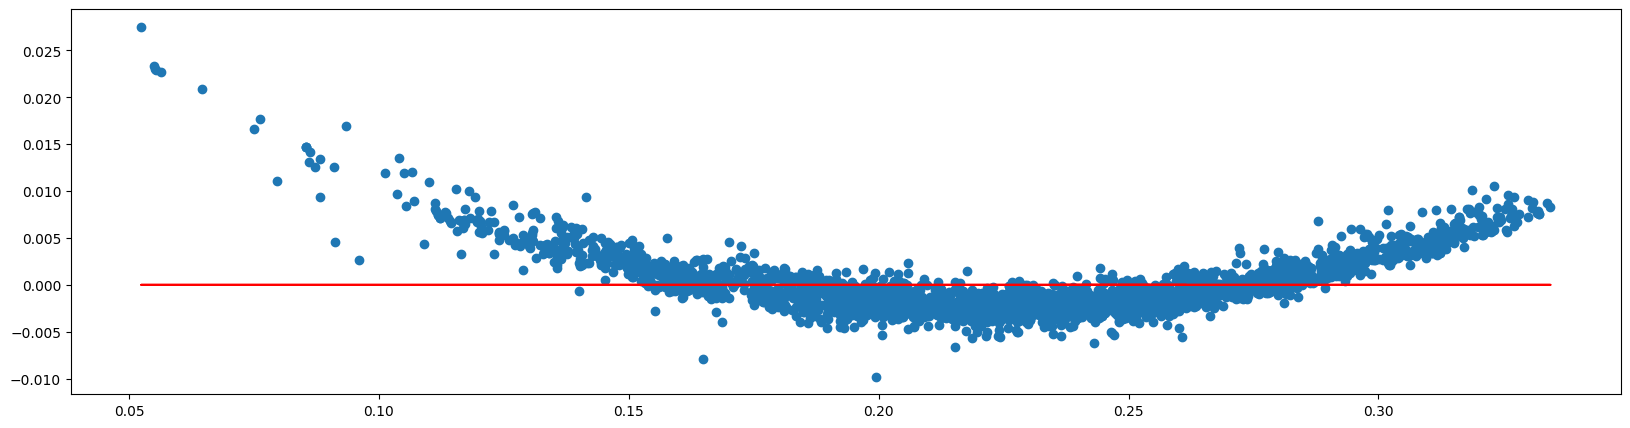

In [63]:
plt.figure(figsize=(20,5))
plt.plot(y_pred,np.zeros(y_pred.shape[0]),'r')
plt.scatter(y_pred,y_test - y_pred)
plt.show()

In [66]:
model = make_pipeline(StandardScaler(),GammaRegressor(alpha=0.5))
model = model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test,y_pred)
print(math.sqrt(mse),r2)

0.00984963209053129 0.9614515837976745


In [67]:
model = make_pipeline(StandardScaler(),PoissonRegressor(alpha=10))
model = model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test,y_pred)
print(math.sqrt(mse),r2)

0.046508942427909525 0.14051272710896578


In [68]:
model = make_pipeline(StandardScaler(),TweedieRegressor(power=1,alpha=10)) #Use documentation
model = model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test,y_pred)
print(math.sqrt(mse),r2)

0.046508942427909525 0.14051272710896578


 Best model and with optimal parameters

In [69]:
model = make_pipeline(StandardScaler(),Ridge(alpha=1))
cross_val_score(model, X, y, cv=10, scoring='neg_mean_absolute_error').mean() * -1

0.0022603733519040207

### **Fit and Export Final Model**

In [70]:
## Choose your best model (with the optimal parameters) and fit it with the entire train dataset (This is what you'll use for testing)
model = make_pipeline(StandardScaler(),Ridge(alpha=1)).fit(X,y)
pickle.dump(model, open('final model.sav', 'wb')) ## You can save the model with pickel if you intend to use it in another file

### **2. Make predictions on the Test Data**

### **STEP 1: Run the same Data Preparation Steps**

In [72]:
test = pd.read_csv('/content/test.csv.zip')
test.head()

,id,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds
0,15289,25.0,0.25,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.399367,0.408088,31.394569
1,15290,12.5,0.25,0.25,0.75,0.63,94.6,57.2,79.0,68.2,33.0,55.9,1.0,0.10,0.488048,0.442866,36.846956
2,15291,12.5,0.25,0.25,0.63,0.63,86.0,52.0,71.9,62.0,30.0,50.8,16.0,0.26,0.583379,0.487057,40.037644
3,15292,25.0,0.50,0.38,0.38,0.63,86.0,52.0,71.9,62.0,30.0,50.8,16.0,0.26,0.433014,0.422847,33.116091
4,15293,37.5,0.75,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,24.0,0.39,0.360996,0.388860,29.558019


In [23]:
test.columns

Index(['id', 'clonesize', 'honeybee', 'bumbles', 'andrena', 'osmia',
       'MaxOfUpperTRange', 'MinOfUpperTRange', 'AverageOfUpperTRange',
       'MaxOfLowerTRange', 'MinOfLowerTRange', 'AverageOfLowerTRange',
       'RainingDays', 'AverageRainingDays', 'fruitset', 'fruitmass', 'seeds'],
      dtype='object')

In [24]:
X = test[['clonesize', 'honeybee', 'bumbles', 'andrena', 'osmia',
       'MaxOfUpperTRange', 'MinOfUpperTRange', 'AverageOfUpperTRange',
       'MaxOfLowerTRange', 'MinOfLowerTRange', 'AverageOfLowerTRange',
       'RainingDays', 'AverageRainingDays', 'fruitset', 'fruitmass', 'seeds']]
X.shape

(10194, 16)

### **STEP 2: Make predictions using fitted model**

In [73]:
loaded_model = pickle.load(open('final model.sav', 'rb'))
y_pred = loaded_model.predict(X)
y_pred.shape

(15289,)

In [74]:
# Make predictions on the test set
y_pred = model2.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Root Mean Squared Error:", math.sqrt(mse))
print("R^2 Score:", r2)

# Print the first few predictions alongside the actual values
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(results.head())

Root Mean Squared Error: 0.006763328376087683
R^2 Score: 0.9818244538443462
         Actual  Predicted
3519   0.231025   0.243457
6096   0.240868   0.238810
895    0.168714   0.172298
11345  0.220572   0.224157
7219   0.125555   0.105389


### **STEP 3: Export the submission file**

In [79]:
# # This is the structure of the final submission file
# sample = pd.read_csv('data sample_submission.csv')
# sample.head()

In [95]:
# final = pd.DataFrame(test['id'],columns=['id'])
# final['yield'] = y_pred
# final = final.set_index('id')
# final.head()

ValueError: Length of values (3058) does not match length of index (10194)

In [82]:
final.to_csv('final submission.csv')